In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(7,11)]
years = [f"{x:04d}" for x in range(290,330)]
i =0
result = np.zeros((160,62,601))

In [3]:
for yy in years:
    for mm in months:
        #data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.'+yy+'-'+mm +'.aice.nc')
        #cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0323-09.aice.nc
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.TEMP.nc')
        plotvar = data.variables['TEMP'][0,:,:,1100]
  
        #plotvar = data.variables['HMXL'][0,:,:]
        lont = data.variables['TLONG'][:,1100]
        latt = data.variables['TLAT'][:,1100]
        #lont = lont[248:344,700:1400]
        #latt = latt[248:344,700:1400]
        plotvar = plotvar[:,:]
#       lont = lont[180:320,500:1200]
#        latt = latt[180:320,500:1200]
#        plotvar = plotvar[180:320,500:1200]
        aveplot = plotvar
        
        result[i] = aveplot
        
        i = i + 1

In [4]:
data2=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0299-09.PD.nc')
PD = data2.variables['PD'][0,:,:]
PD = PD[:,270:370,1100]
PD = (PD-1)*1000

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/numpy/ma/core.py:1015: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [5]:

        B=latt

In [6]:
re = np.nanmean(result,axis=0)

In [7]:
re

array([[-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         3.37760869e+00,  3.49417424e+00,  3.60263751e+00],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         3.37794627e+00,  3.49457584e+00,  3.60309690e+00],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         3.37687470e+00,  3.49355006e+00,  3.60205021e+00],
       ...,
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         9.96920997e+36,  9.96920997e+36,  9.96920997e+36],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         9.96920997e+36,  9.96920997e+36,  9.96920997e+36],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         9.96920997e+36,  9.96920997e+36,  9.96920997e+36]])

In [8]:
re = np.nanmean(result,axis=0)
re[re ==  -1] = np.nan
re[re > 50] = np.nan

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
#A = np.arange(62)
#B = np.arange(80)
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn1/z_t.nc')
A = data1.variables['z_t'][:]/100
#B = np.arange(601)
#B= lontu
xx, yy = np.meshgrid(B, A)
###############################################################
my_font = {'fontname':'Cambria', 'size':'45'}
nice_cmap=sns.diverging_palette(245, 15, n=11,as_cmap=True)
lev_cmap = nice_cmap([1,10,20,30,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-1.2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6]
nice_levels2 = [-0.8,-0.6,-0.4,-0.2,0,0.2,0.4]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************
#********************************************************************
#********************************************************************

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'spacing'
  
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


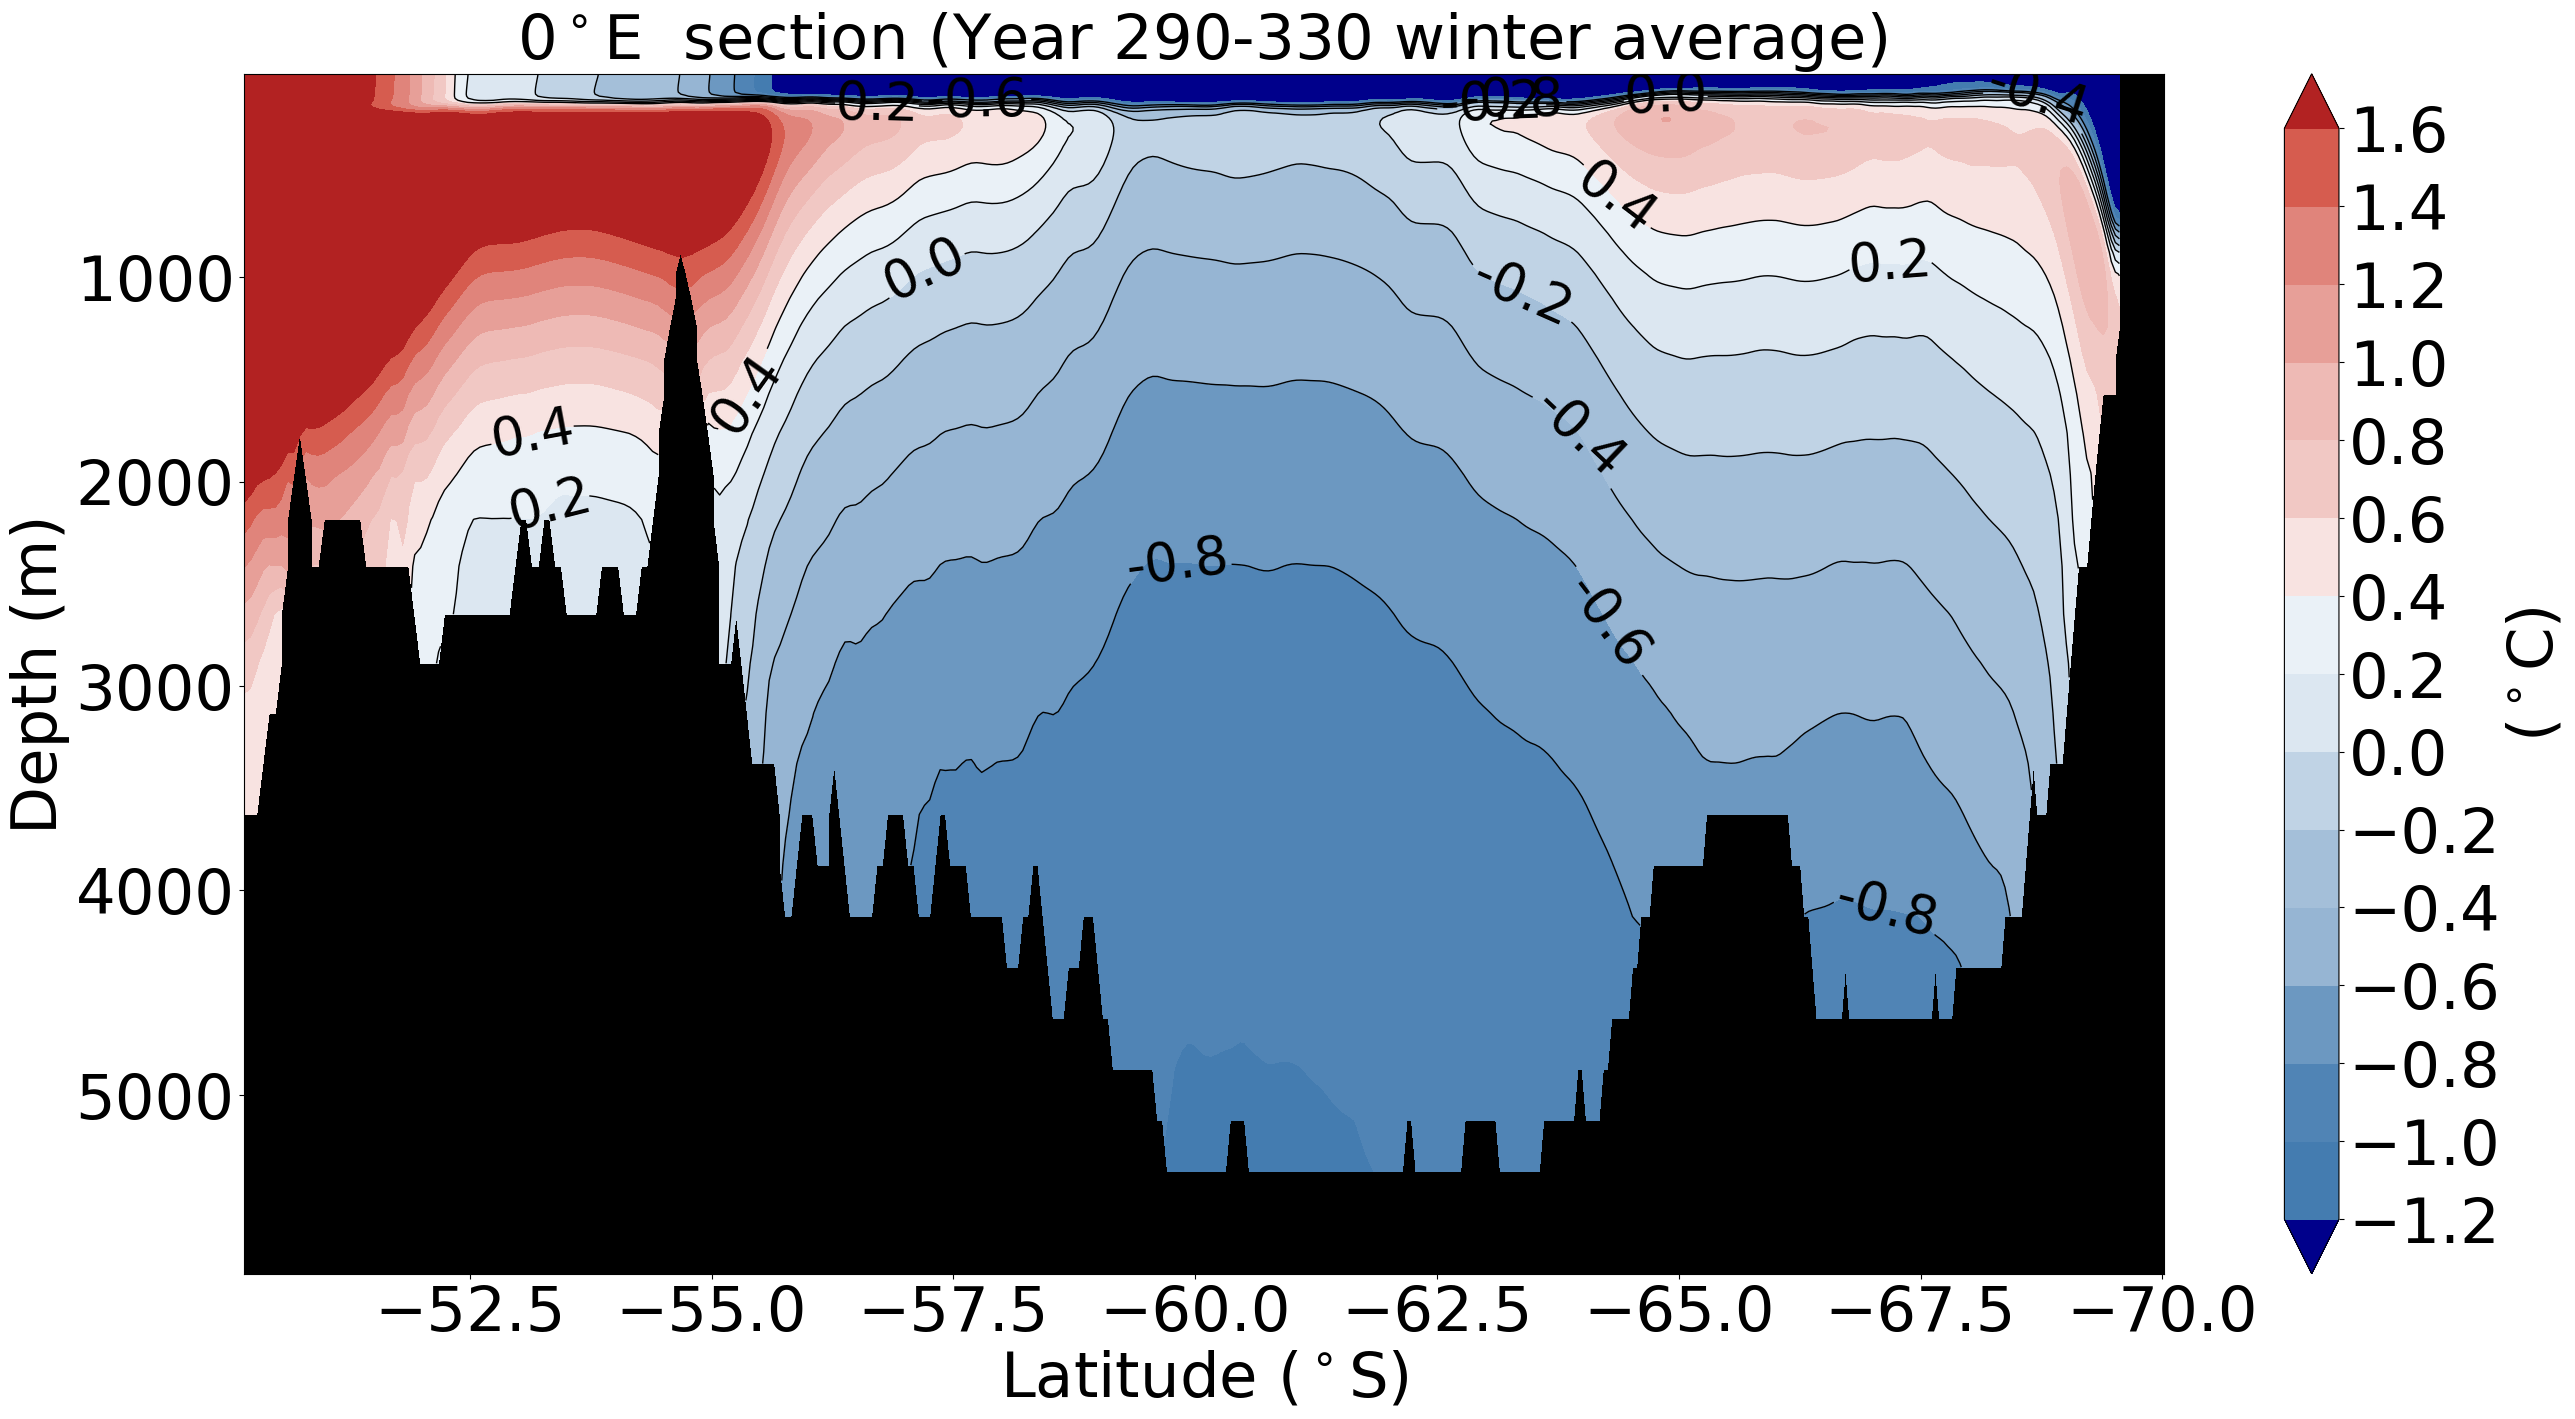

In [10]:
# plot the result
my_font = {'fontname':'Cambria', 'size':'45'}
fig = plt.figure(figsize=(30,15), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
#im = ax0.contourf(xx, yy, plotvar,cmap=new_cmap)
im = ax0.contourf(xx[:,200:], yy[:,200:], re[:,200:],cmap=new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
CS = ax0.contour(xx[:,200:], yy[:,200:], re[:,200:],nice_levels2,colors = 'black', linestyles = 'solid',linewidths=1)
ax0.set_facecolor("BLACK")
im.cmap.set_over("firebrick")
im.cmap.set_under("darkblue")
#CS = ax0.contour(xx[:40,270:370], yy[:40,270:370], PD[:40,:],[27.74,27.75,27.76,27.77,27.78,27.782,27.784,27.786,27.788,27.79,27.792,27.794,27.796,27.798,27.80],colors = 'black', linestyles = 'solid',linewidths=3)
plt.clabel(CS, inline=1, fmt='%1.1f',fontsize=38)
#plt.clabel(CS, inline=1, fontsize=9)
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels)
cbar.set_label('($^\circ$C)', **my_font)
cbar.ax.tick_params(labelsize=45)
ax0.set_title('0$^\circ$E  section (Year 290-330 winter average) ',**my_font)
#############################################################################
##设定X坐标值
plt.xticks(**my_font)#range(0,151,30), ['63$^\circ$W', '60$^\circ$W', '57$^\circ$W', '54$^\circ$W', '51$^\circ$W','48$^\circ$W'])
plt.yticks(**my_font)#range(0,46,5), ['5', '55','105', '155', '210', '285','408','638','1106','1968'])#,'3133','4375','5625'])

plt.xlabel('Latitude ($^\circ$S)',**my_font)
plt.ylabel('Depth (m)',**my_font)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.savefig("temperature290-3.png",bbox_inches='tight',dpi=fig.dpi)